In [6]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [7]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
Categories=['American','Chicago'] 
flat_data_arr=[] 
target_arr=[] 
datadir=r'C:\Users\kajal tulshyan\Documents\architectural-styles-dataset\Architectures'

for i in Categories: 
	
	print(f'loading... category : {i}') 
	path=os.path.join(datadir,i) 
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img)) 
		img_resized=resize(img_array,(256,256,3)) 
		flat_data_arr.append(img_resized.flatten()) 
		target_arr.append(Categories.index(i)) 
	print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)

loading... category : American
loaded category:American successfully
loading... category : Chicago
loaded category:Chicago successfully


In [8]:
import pandas as pd 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape

(400, 196609)

In [9]:
x=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=77,stratify=y) 

In [11]:
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
param_grid={'C':[0.1,1,10,100], 'gamma':[0.0001,0.001,0.1,1], 'kernel':['rbf','poly']} 
svc=svm.SVC(probability=True) 
model=GridSearchCV(svc,param_grid)

In [12]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [13]:
y_pred = model.predict(x_test)  
accuracy = accuracy_score(y_pred, y_test) 
print(f"The model is {accuracy*100}% accurate")

The model is 80.0% accurate


In [14]:
print(classification_report(y_test, y_pred, target_names=['American', 'Chicago']))

              precision    recall  f1-score   support

    American       0.82      0.78      0.79        80
     Chicago       0.79      0.82      0.80        80

    accuracy                           0.80       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.80      0.80      0.80       160



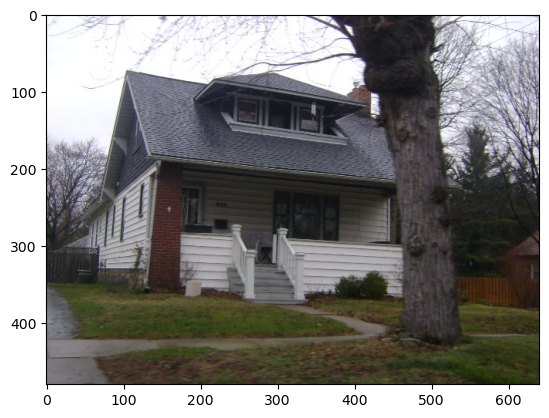

American = 62.868095408418725%
Chicago = 37.13190459158129%
The predicted image is : American


In [10]:
path=r'C:\Users\kajal tulshyan\Documents\architectural-styles-dataset\Architectures\10_Mount_Clemens_Craftsman.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(256,256,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])

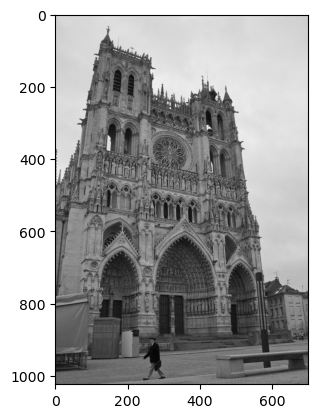

American = 2.153845832374681%
Chicago = 97.84615416762531%
The predicted image is : Chicago


In [11]:
path=r'C:\Users\kajal tulshyan\Documents\architectural-styles-dataset\Architectures\02_0002.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(256,256,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])